In [ ]:
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
data = pd.read_csv('train_meta_df (1).csv')

In [ ]:
data = data.abs()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comp_id         3000 non-null   int64  
 1   ad_blocked      3000 non-null   bool   
 2   embed           3000 non-null   bool   
 3   ratio           3000 non-null   float64
 4   duration        3000 non-null   int64  
 5   language        3000 non-null   int64  
 6   partner         3000 non-null   bool   
 7   partner_active  3000 non-null   bool   
 8   n_likes         3000 non-null   int64  
 9   views           3000 non-null   int64  
 10  n_tags          3000 non-null   int64  
 11  n_formats       3000 non-null   int64  
 12  dayofweek       3000 non-null   int64  
 13  hour            3000 non-null   int64  
 14  Average         3000 non-null   float64
 15  average_t       3000 non-null   float64
 16  average_d       3000 non-null   float64
dtypes: bool(4), float64(4), int64(9)


In [ ]:
data.head(5)

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour,Average,average_t,average_d
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6,0.024423,0.113135,0.129038
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6,0.011685,0.107456,0.129038
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6,0.013306,0.067066,0.278721
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6,0.016042,0.016965,0.281460
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6,0.002058,0.110706,0.053555


In [ ]:
X = data.drop(columns=['views'])
y = data['views']


In [ ]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install xgboost



                                              0.0/99.8 MB ? eta -:--:--
                                              0.5/99.8 MB 9.8 MB/s eta 0:00:11
                                              0.8/99.8 MB 8.4 MB/s eta 0:00:12
                                              1.0/99.8 MB 7.6 MB/s eta 0:00:13
                                              1.1/99.8 MB 6.6 MB/s eta 0:00:15
                                              1.3/99.8 MB 6.0 MB/s eta 0:00:17
                                              1.5/99.8 MB 5.6 MB/s eta 0:00:18
                                              1.7/99.8 MB 5.4 MB/s eta 0:00:19
                                              1.9/99.8 MB 5.2 MB/s eta 0:00:19
                                              2.0/99.8 MB 5.0 MB/s eta 0:00:20
                                              2.2/99.8 MB 4.9 MB/s eta 0:00:20
                                              2.4/99.8 MB 4.8 MB/s eta 0:00:21
     -                                        2.6/99.8 MB 

In [ ]:
import xgboost as xgb

# Your code for defining and training the XGBRegressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Your code for calculating and printing the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 964.7509880619184


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
src = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (SRC):", src)


Mean Squared Error: 930744.4689664477
Mean Absolute Error: 558.9002663167317
R-squared (SRC): 0.15112954704242543


In [ ]:
import matplotlib.pyplot as plt

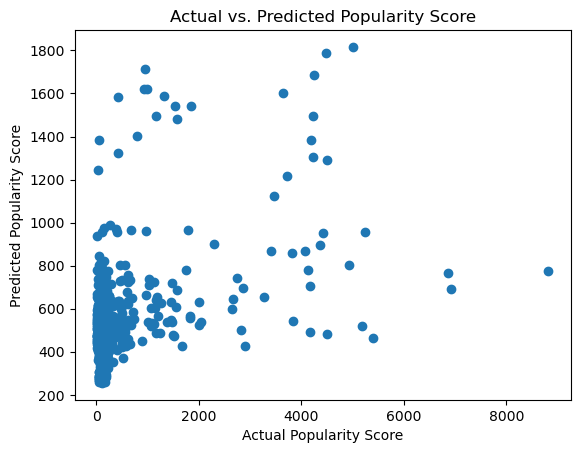

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title('Actual vs. Predicted Popularity Score')
plt.show()


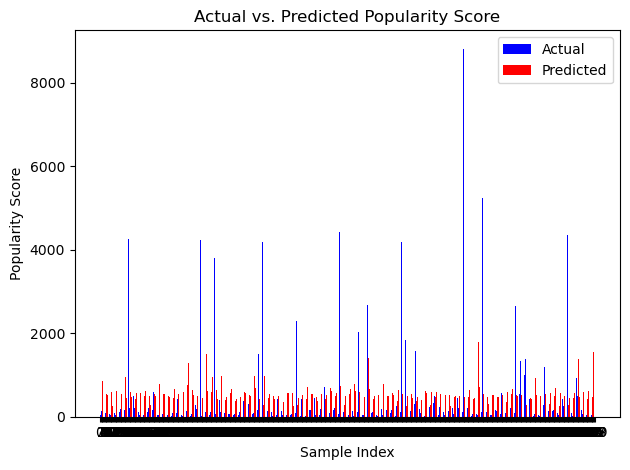

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined
# Creating an array for indices
indices = np.arange(len(y_test))

# Bar width
bar_width = 0.35

# Creating bars for actual and predicted scores
plt.bar(indices, y_test, bar_width, label='Actual', color='b')
plt.bar(indices + bar_width, y_pred, bar_width, label='Predicted', color='r')

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Popularity Score')
plt.title('Actual vs. Predicted Popularity Score')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


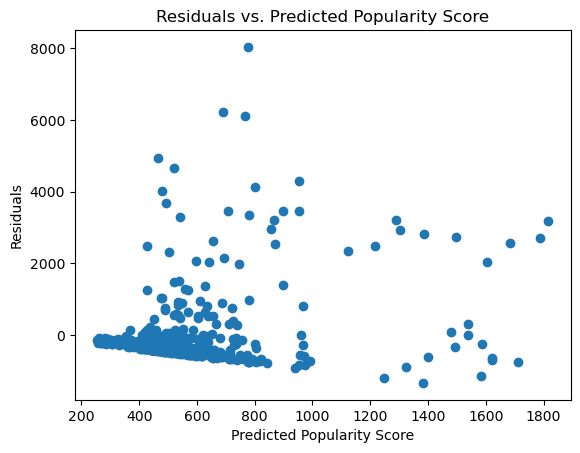

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Popularity Score')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Popularity Score')
plt.show()


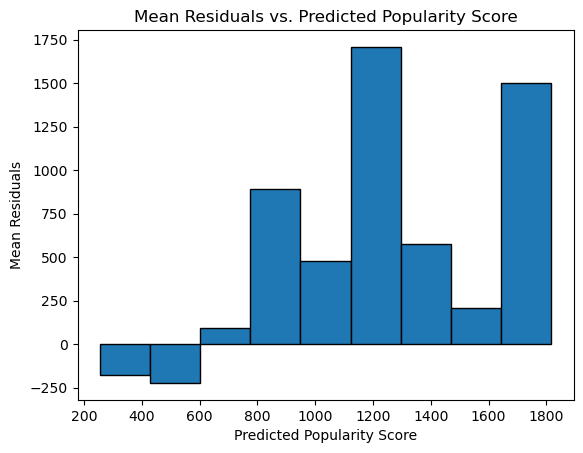

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Define bins for predicted popularity score
bins = np.linspace(min(y_pred), max(y_pred), 10)

# Calculate mean residuals for each bin
mean_residuals = [np.mean(residuals[(y_pred >= bins[i]) & (y_pred < bins[i+1])]) for i in range(len(bins)-1)]

# Plotting the bar graph
plt.bar(bins[:-1], mean_residuals, width=(bins[1]-bins[0]), align='edge', edgecolor='black')
plt.xlabel('Predicted Popularity Score')
plt.ylabel('Mean Residuals')
plt.title('Mean Residuals vs. Predicted Popularity Score')
plt.show()
